In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
dphi = np.array([0.00099, 0.01259, 0.02259, 0.03259, 0.04259, 0.06259, 0.08259, 0.10259, 0.12259, 0.14259, 0.16259, 0.18259, 
                 0.20259, 0.22259, 0.24259, 0.26259, 0.28259, 0.30259, 0.32259, 0.34259, 0.39259, 0.44259, 0.49259, 0.54259, 
                 0.59259, 0.64259, 0.69259, 0.74259, 0.84259, 0.94259, 1.04259])
ql0 = np.array([10.512, 10.409, 10.161, 9.7880, 9.3170, 8.2121, 7.0871, 6.0918, 5.2653, 4.5801, 3.9988, 3.5009, 3.0773, 2.7164,
                2.4032, 2.1263, 1.8822, 1.6712, 1.4909, 1.3345, 1.0125, 0.7831, 0.6128, 0.4821, 0.3872, 0.3145, 0.2573, 0.2123, 
                0.1475, 0.1047, 0.0752])
ql2 = np.array([9.8631, 9.7903, 9.6136, 9.3439, 8.9948, 8.1334, 7.1796, 6.2539, 5.4240, 4.7096, 4.1034, 3.5889, 3.1502, 2.7740, 
                2.4489, 2.1663, 1.9200, 1.7056, 1.5190, 1.3562, 1.0305, 0.7948, 0.6214, 0.4915, 0.3938, 0.3188, 0.2602, 0.2141,
                0.1477, 0.1040, 0.0738])
ql8 = np.array([8.6893, 8.6506, 8.5557, 8.4079, 8.2108, 7.6938, 7.0601, 6.3686, 5.6708, 5.0053, 4.3958, 3.8530, 3.3778, 2.9658,
                2.6098, 2.3023, 2.0362, 1.8054, 1.6046, 1.4296, 1.0820, 0.8309, 0.6470, 0.5104, 0.4075, 0.3288, 0.2676, 0.2197,  
                0.1510, 0.1058, 0.0745])

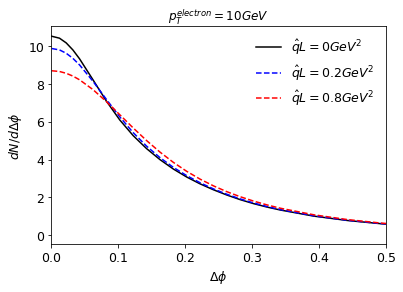

In [3]:
plt.plot(dphi, ql0, color='black', label='$\hat{q}L=0GeV^2$')
plt.plot(dphi, ql2, 'b--', label='$\hat{q}L=0.2GeV^2$')
plt.plot(dphi, ql8, 'r--', label='$\hat{q}L=0.8GeV^2$')
plt.title('$p_T^{electron} = 10 GeV$')
plt.xlabel('$\Delta\phi$', fontsize=12.5)
plt.ylabel('$dN/d\Delta\phi$', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.xlim(left=0, right=0.5)
plt.legend(prop={'size': 12.5}, frameon=False, loc='best')

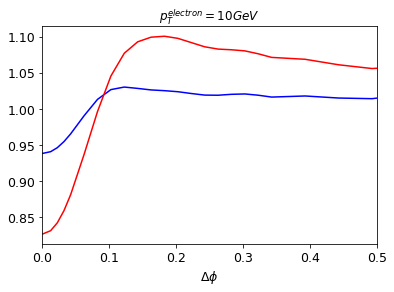

In [4]:
plt.plot(dphi, ql2/ql0, color='b')
plt.plot(dphi, ql8/ql0, color='r')
plt.title('$p_T^{electron} = 10 GeV$')
plt.xlabel('$\Delta\phi$', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.xlim(left=0, right=0.5)
plt.legend(prop={'size': 12.5}, frameon=False, loc='best')

In [4]:
files = ["$HOME/EIC/output/821.root"]
a = getData(files)


Processed $HOME/EIC/output/821.root in 177.8 seconds


In [7]:
d = applyCut(a, 'pt_electron > 9 and pt_electron < 11', '9 < pt_electron < 11 GeV')
d = fixPhi(d, 'photon')

9 < pt_electron < 11 GeV 386784  fraction kept: 0.7
Fixed photon phi range
Fixed photon delta phi range


In [10]:
d.eval('nu = 0.533*Q2/x',inplace=True)

In [11]:
print np.mean(d['x']), np.mean(d['nu'])

0.1382117 879.19226


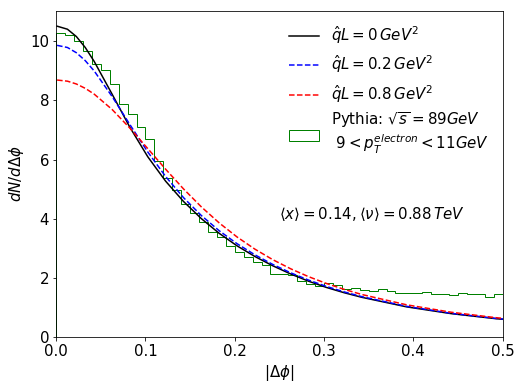

In [13]:
fig = plt.figure(figsize = (8,6))
hist = plt.hist(d['delta_phi_photon_abs'], range=(0,0.5), bins=50)
plt.cla()
weights = [np.trapz(ql0,dphi)/integrate(0.01, hist[0], 0, 0.5)] * len(d['delta_phi_photon_abs'])
plt.hist(d['delta_phi_photon_abs'], range=(0,0.5), bins=50, histtype='step', color='green', label='Pythia: $\sqrt{s}=89GeV$ \n $9 < p_T^{electron} < 11 GeV$', weights=weights)
plt.plot(dphi, ql0, color='black', label='$\hat{q}L=0 \, GeV^2$')
plt.plot(dphi, ql2, 'b--', label='$\hat{q}L=0.2 \, GeV^2$')
plt.plot(dphi, ql8, 'r--', label='$\hat{q}L=0.8 \, GeV^2$')
plt.xlim(left=0, right=0.5)
plt.xlabel('$|\Delta\phi|$', fontsize=15)
plt.ylabel('$dN/d\Delta\phi$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(0.25,4,r'$\langle x \rangle = 0.14, \langle \nu \rangle = 0.88 \, TeV$', fontsize = 15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.savefig('images/fig4.pdf', bbox_inches='tight')

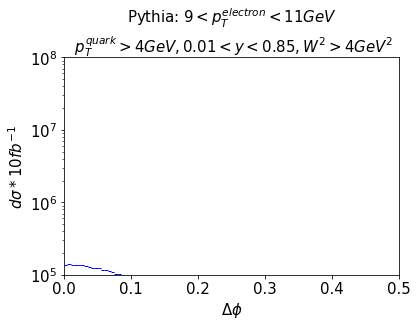

In [10]:
plot1d(e, 'delta_phi_photon_abs', 0, 0.5, 1e5, 1e8, 0.005, '$\Delta\phi$', 'log', \
       'Pythia: ' + '$9 < p_T^{electron} < 11 GeV$ \n $p_T^{quark} > 4 GeV, 0.01 < y < 0.85, W^2 > 4 GeV^2$', '')

In [11]:
e = applyCut(b1, 'pt_electron > 9 and pt_electron < 11', '9 < pt_electron < 11 GeV')

9 < pt_electron < 11 GeV 44078  fraction kept: 4.2


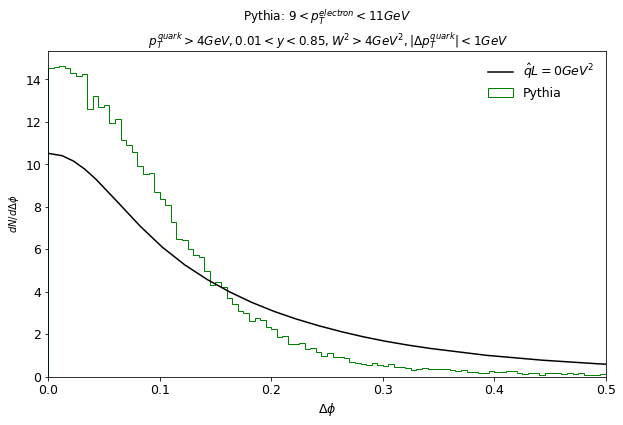

In [12]:
fig = plt.figure(figsize = (10,6))
hist = plt.hist(e['delta_phi_photon_abs'], range=(0,0.5), bins=100)
plt.cla()
weights = [np.trapz(ql0,dphi)/integrate(0.005, hist[0], 0, 0.5)] * len(e['delta_phi_photon_abs'])
plt.hist(e['delta_phi_photon_abs'], range=(0,0.5), bins=100, histtype='step', color='green', label='Pythia', weights=weights)
plt.plot(dphi, ql0, color='black', label='$\hat{q}L=0GeV^2$')
plt.xlim(left=0, right=0.5)
plt.xlabel('$\Delta\phi$', fontsize=12.5)
plt.ylabel('$dN/d\Delta\phi$')
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.title('Pythia: ' + '$9 < p_T^{electron} < 11 GeV$ \n $p_T^{quark} >4GeV,0.01<y<0.85,W^2>4 GeV^2,|\Delta p_T^{quark}|<1GeV$')
plt.legend(prop={'size': 12.5}, frameon=False, loc='best')

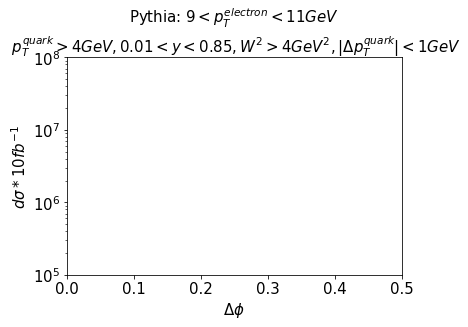

In [13]:
plot1d(e, 'delta_phi_photon_abs', 0, 0.5, 1e5, 1e8, 0.005, '$\Delta\phi$', 'log', \
       'Pythia: ' + '$9 < p_T^{electron} < 11 GeV$ \n $p_T^{quark} > 4 GeV, 0.01 < y < 0.85, W^2 > 4 GeV^2, |\Delta p_T^{quark}|<1GeV$', '')

In [14]:
e = applyCut(b2, 'pt_electron > 9 and pt_electron < 11', '9 < pt_electron < 11 GeV')

9 < pt_electron < 11 GeV 114503  fraction kept: 4.6


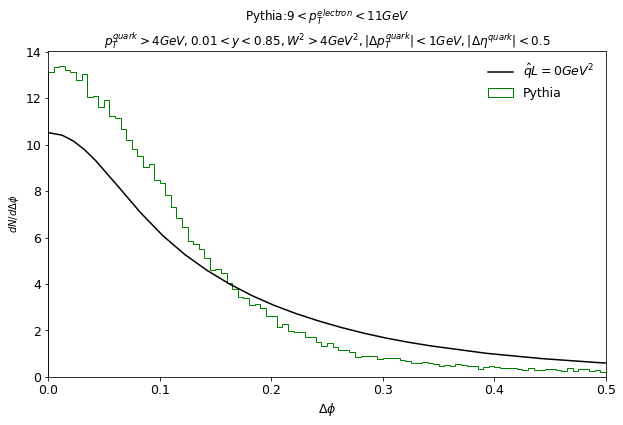

In [15]:
fig = plt.figure(figsize = (10,6))
hist = plt.hist(e['delta_phi_photon_abs'], range=(0,0.5), bins=100)
plt.cla()
weights = [np.trapz(ql0,dphi)/integrate(0.005, hist[0], 0, 0.5)] * len(e['delta_phi_photon_abs'])
plt.hist(e['delta_phi_photon_abs'], range=(0,0.5), bins=100, histtype='step', color='green', label='Pythia', weights=weights)
plt.plot(dphi, ql0, color='black', label='$\hat{q}L=0GeV^2$')
plt.xlim(left=0, right=0.5)
plt.xlabel('$\Delta\phi$', fontsize=12.5)
plt.ylabel('$dN/d\Delta\phi$')
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.title('Pythia:'+'$9<p_T^{electron}<11GeV$\n$p_T^{quark}>4GeV,0.01<y<0.85,W^2>4GeV^2,|\Delta p_T^{quark}|<1GeV,|\Delta\eta^{quark}|<0.5$')
plt.legend(prop={'size': 12.5}, frameon=False, loc='best')

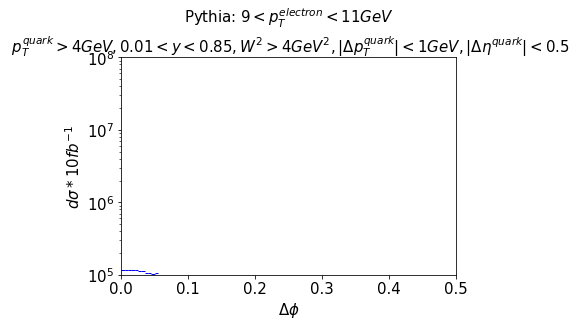

In [16]:
plot1d(e, 'delta_phi_photon_abs', 0, 0.5, 1e5, 1e8, 0.005, '$\Delta\phi$', 'log', \
       'Pythia: ' + '$9 < p_T^{electron} < 11 GeV$ \n $p_T^{quark} > 4 GeV, 0.01 < y < 0.85, W^2 > 4 GeV^2, |\Delta p_T^{quark}|<1GeV, |\Delta\eta^{quark}|<0.5$', '')

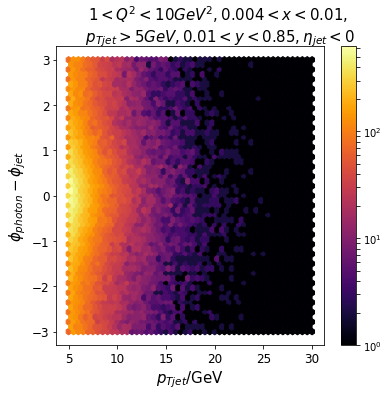

In [40]:
plotDphi(ds[0][1], '1 < Q^2 < 10 GeV^2', '0.004 < x < 0.01', '1_01')

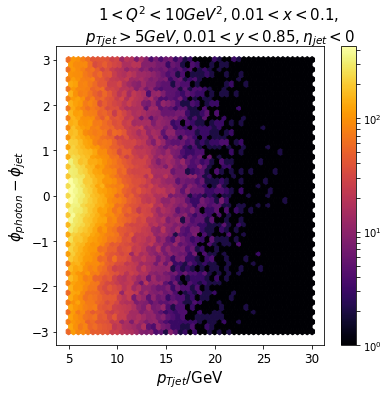

In [41]:
plotDphi(ds[0][2], '1 < Q^2 < 10 GeV^2', '0.01 < x < 0.1', '1_1')

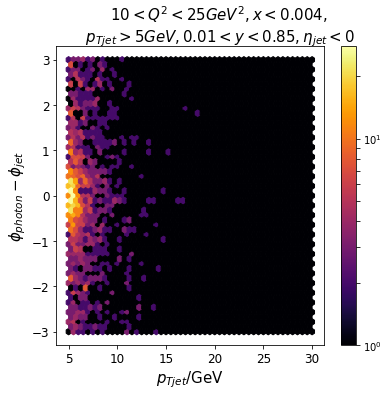

In [42]:
plotDphi(ds[1][0], '10 < Q^2 < 25 GeV^2', 'x < 0.004', '10_004')

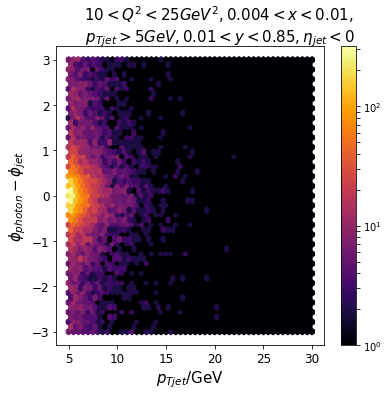

In [43]:
plotDphi(ds[1][1], '10 < Q^2 < 25 GeV^2', '0.004 < x < 0.01', '10_01')

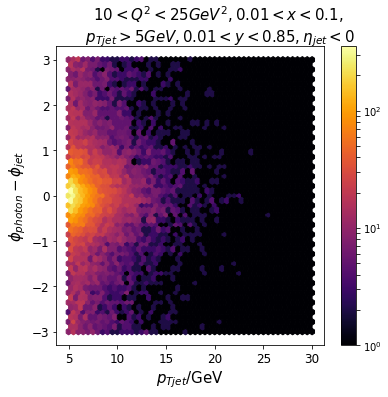

In [44]:
plotDphi(ds[1][2], '10 < Q^2 < 25 GeV^2', '0.01 < x < 0.1', '10_1')

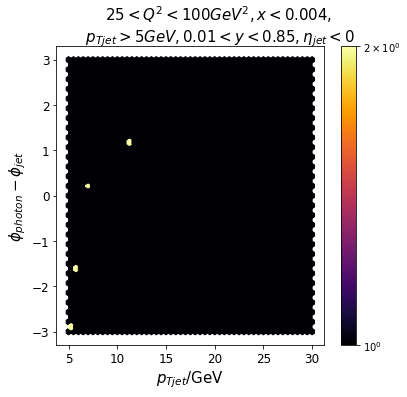

In [45]:
plotDphi(ds[2][0], '25 < Q^2 < 100 GeV^2', 'x < 0.004', '25_004')

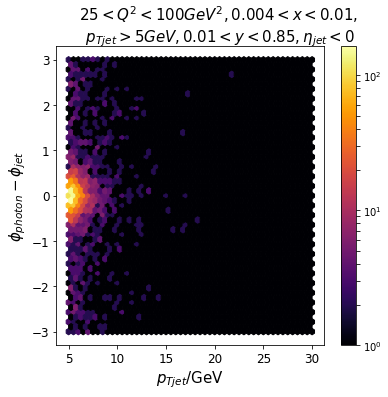

In [46]:
plotDphi(ds[2][1], '25 < Q^2 < 100 GeV^2', '0.004 < x < 0.01', '25_01')

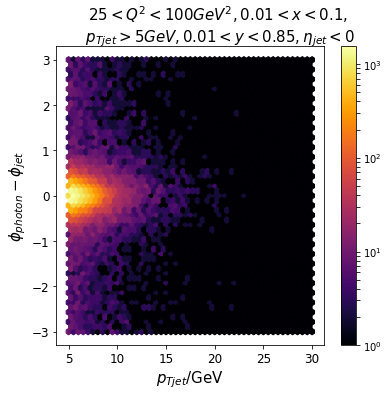

In [47]:
plotDphi(ds[2][2], '25 < Q^2 < 100 GeV^2', '0.01 < x < 0.1', '25_1')

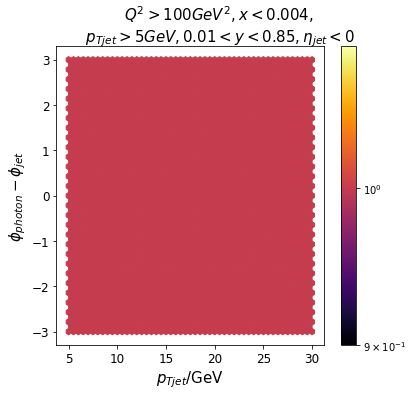

In [48]:
plotDphi(ds[3][0], 'Q^2 > 100 GeV^2', 'x < 0.004', '100_004')

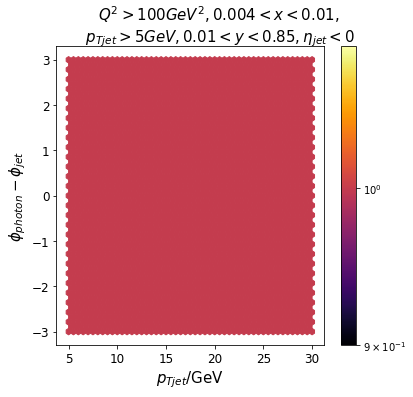

In [49]:
plotDphi(ds[3][1], 'Q^2 > 100 GeV^2', '0.004 < x < 0.01', '100_01')

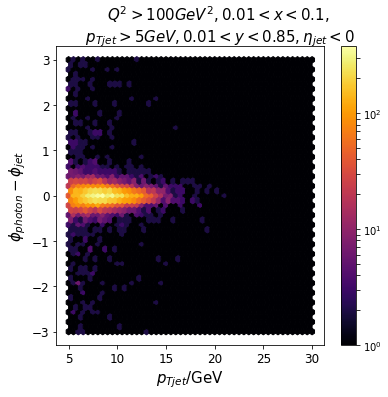

In [50]:
plotDphi(ds[3][2], 'Q^2 > 100 GeV^2', '0.01 < x < 0.1', '100_1')